In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def simulate_wealth_distribution(initial_wealth, num_steps, num_agents, vol):
    wealth = np.zeros((num_agents, num_steps))
    wealth[:, 0] = initial_wealth

    for t in range(1, num_steps):
        shocks = np.random.normal(0, vol, size=num_agents)


        wealth[:, t] = wealth[:, t - 1] + shocks

    return wealth







In [30]:
Ticker = 'AAPL'
start = '2021-01-01'
end = '2024-03-31'

In [31]:
data = yf.download(Ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [32]:
data_ = pd.DataFrame(data)

In [33]:
data_

,Adj Close
Date,
2021-01-04,127.002106
2021-01-05,128.572327
2021-01-06,124.244377
2021-01-07,128.484009
2021-01-08,129.592957
...,...
2024-02-26,181.160004
2024-02-27,182.630005
2024-02-28,181.419998


In [34]:
returns = data_.pct_change().dropna()

In [35]:
initial_wealth = 1000
num_agents = 1000
num_steps = len(returns)
vol = returns.std()


In [36]:
wealth = simulate_wealth_distribution(initial_wealth, num_steps, num_agents, vol)

In [38]:
wealth[-1]

array([1000.        , 1000.00628183, 1000.00353696, 1000.01268395,
        999.98593009, 1000.0225958 , 1000.02613843, 1000.01575464,
       1000.0143274 , 1000.00683677,  999.96216774,  999.95742795,
        999.9821394 , 1000.00269006, 1000.00953508, 1000.04311023,
       1000.02015561, 1000.04481672, 1000.04312125, 1000.04504923,
       1000.03854075, 1000.01203425, 1000.00339363,  999.98689239,
        999.95476015,  999.93065339,  999.92706735,  999.90273364,
        999.90809339,  999.89522887,  999.87111855,  999.84517105,
        999.80918467,  999.81471862,  999.83130631,  999.8325391 ,
        999.84946329,  999.87460028,  999.89518075,  999.92980766,
        999.93719833,  999.9627353 ,  999.96221836,  999.9609174 ,
        999.96994396, 1000.01028254,  999.98434908,  999.99492999,
        999.98535187,  999.97891204, 1000.00618924,  999.99042299,
       1000.011226  ,  999.99093705, 1000.00577103, 1000.01442437,
       1000.00515841,  999.97973357, 1000.0160674 , 1000.00750

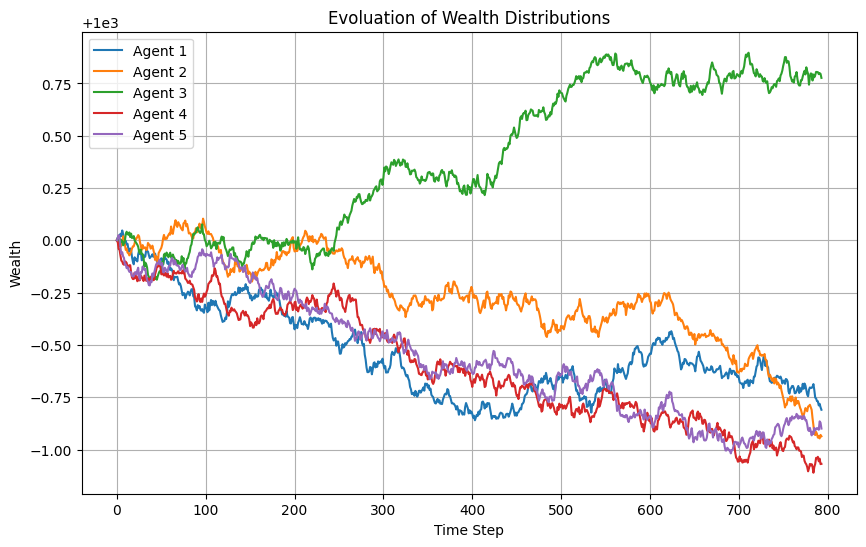

In [39]:
plt.figure(figsize=(10, 6))
for agent in range(5):
    plt.plot(wealth[agent], label='Agent {}'.format(agent + 1))
plt.title('Evoluation of Wealth Distributions')
plt.xlabel('Time Step')
plt.ylabel('Wealth')
plt.legend()
plt.grid(True)
plt.show()